In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# import some data to play with
iris = datasets.load_iris()
#data = pd.DataFrame(iris)
iris
df = pd.DataFrame(iris['data'],columns = iris["feature_names"])
df["targets"] = iris["target"]
df["target1"] = ["Setosa" if i == 0 else "Versicolor" if i ==1 else "Virginica" for i in df.targets]
df.iloc[1:3,2:4] = np.nan
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets,target1
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,NaN,NaN,0,Setosa
2,4.7,3.2,NaN,NaN,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [3]:
# create a data summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
count,150.000000,150.000000,148.000000,148.000000,150.000000
mean,5.843333,3.057333,3.790541,1.212838,1.000000
std,0.828066,0.435866,1.754618,0.758380,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# check for nulls
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    2
petal width (cm)     2
targets              0
target1              0
dtype: int64

In [5]:
 for i in df.iloc[:,0:4].columns:
        print(i)
        df[i]=df[i].fillna(df[i].mean())

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [6]:
# check data types
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
targets                int32
target1               object
dtype: object

In [7]:
# create a function that converts the targets to "Setosa" if target =0 else "Versicolor" if i = 1 else "Virginica"
newdf=[]
#def changer(n):
for n in df.targets:
    if n==0:
        newdf.append("Setosa")
    elif n==1:
        newdf.append("Versicolor")
    else:
        newdf.append("Virginica")        

In [8]:
df["targets_sth"]=newdf

In [9]:

def changer(text):
    if text ==0:
        return "Setosa"
    elif text ==1:
        return "Versicolor"
    else:
        return "Virginica"
df["Targets"] =list(map(changer,df["targets"]))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets,target1,targets_sth,Targets
0,5.1,3.5,1.400000,0.200000,0,Setosa,Setosa,Setosa
1,4.9,3.0,3.790541,1.212838,0,Setosa,Setosa,Setosa
2,4.7,3.2,3.790541,1.212838,0,Setosa,Setosa,Setosa
3,4.6,3.1,1.500000,0.200000,0,Setosa,Setosa,Setosa
4,5.0,3.6,1.400000,0.200000,0,Setosa,Setosa,Setosa


In [10]:
# use map apply for above function and create a new column called output
# drop columns: "targets","target1"
# shuffle the data
df = df.sample(frac = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets,target1,targets_sth,Targets
77,6.7,3.0,5.0,1.7,1,Versicolor,Versicolor,Versicolor
148,6.2,3.4,5.4,2.3,2,Virginica,Virginica,Virginica
88,5.6,3.0,4.1,1.3,1,Versicolor,Versicolor,Versicolor
53,5.5,2.3,4.0,1.3,1,Versicolor,Versicolor,Versicolor
9,4.9,3.1,1.5,0.1,0,Setosa,Setosa,Setosa


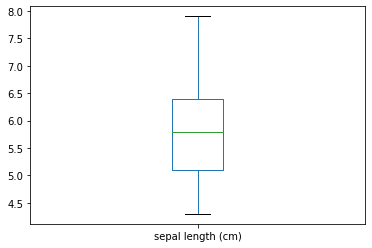

In [53]:
 #visualize all the columns using appropriate visualizations
df["sepal length (cm)"].plot(kind="box")

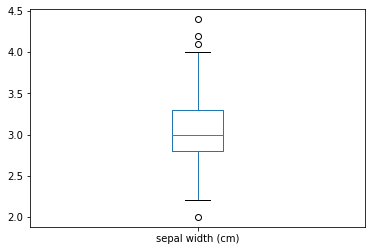

In [56]:
df["sepal width (cm)"].plot(kind="box")

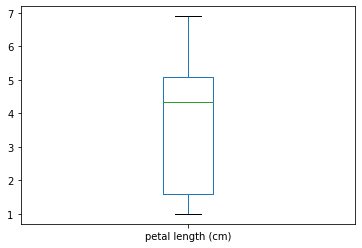

In [57]:
df['petal length (cm)'].plot(kind="box")

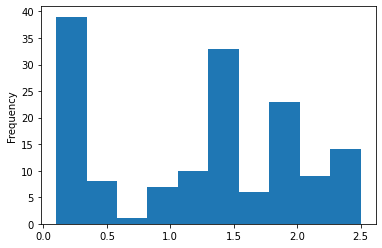

In [59]:
df['petal width (cm)'].plot(kind="hist")

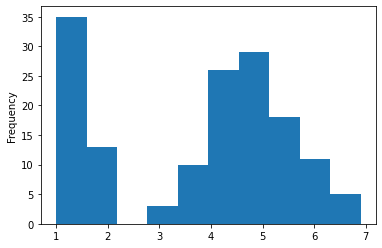

In [60]:
df['petal length (cm)'].plot(kind="hist")

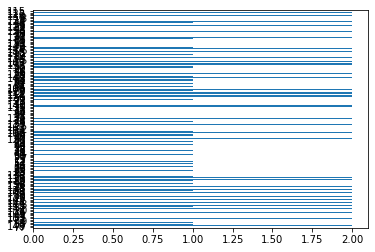

In [68]:
df["targets"].plot(kind="barh")

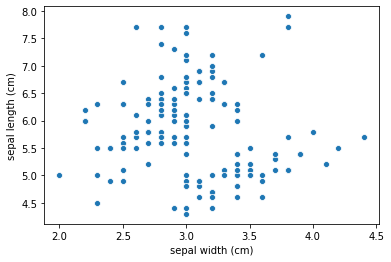

In [76]:
# create a scatter plot using any two columns and use the output as the hue ( seaborn)
import seaborn as sns
sns.scatterplot(data=df,
               x="sepal width (cm)",
               y="sepal length (cm)")

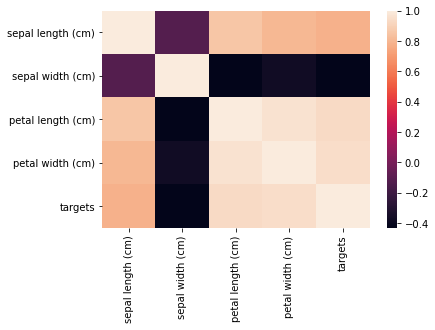

In [70]:
# create a corelation heatmap
sns.heatmap(df.corr())

In [12]:
# standardize the data
# research on data scaling and standardizing
df = df.dropna()
x = df.drop(["targets","target1"],1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled = scale.fit_transform(x)

ValueError: could not convert string to float: 'Versicolor'

In [ ]:
# PCA
# research what is PCA analysis
from sklearn.decomposition import PCA
pca =PCA()
pca_data = pca.fit_transform(scaled)

data = pd.DataFrame(pca_data[:,0:2],columns = ["C1","C2"])
data["target"] = df.target1
data.head()

import seaborn as sns
sns.scatterplot(data = data,x = "C1",y = "C2",hue = "target")

In [ ]:
#Modelling
# train test split
# create three models ( Logistic regression, Support vector machine, gradient boosting)
# train all the models
# predict using the three models
# use accuracy score, confusion matrix and  classification report to compare the three models

In [13]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'targets', 'target1', 'targets_sth', 'Targets'],
      dtype='object')

In [22]:
#split the data into x and y
x=df[['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)','targets_sth']]
y=df['Targets']

In [35]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [48]:
#initialize model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [49]:
#fit model
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'Versicolor'

In [50]:
#step 5
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(x_test))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.